In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

In [8]:
data = pd.read_csv("diabetes.csv")

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


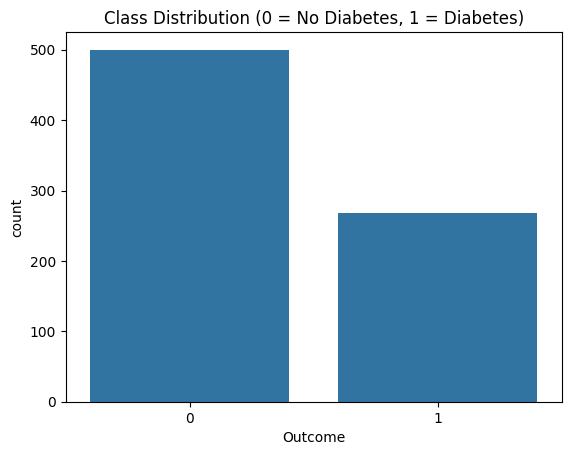

In [17]:
# Class distribution
sns.countplot(x='Outcome', data=data)
plt.title("Class Distribution (0 = No Diabetes, 1 = Diabetes)")
plt.show()

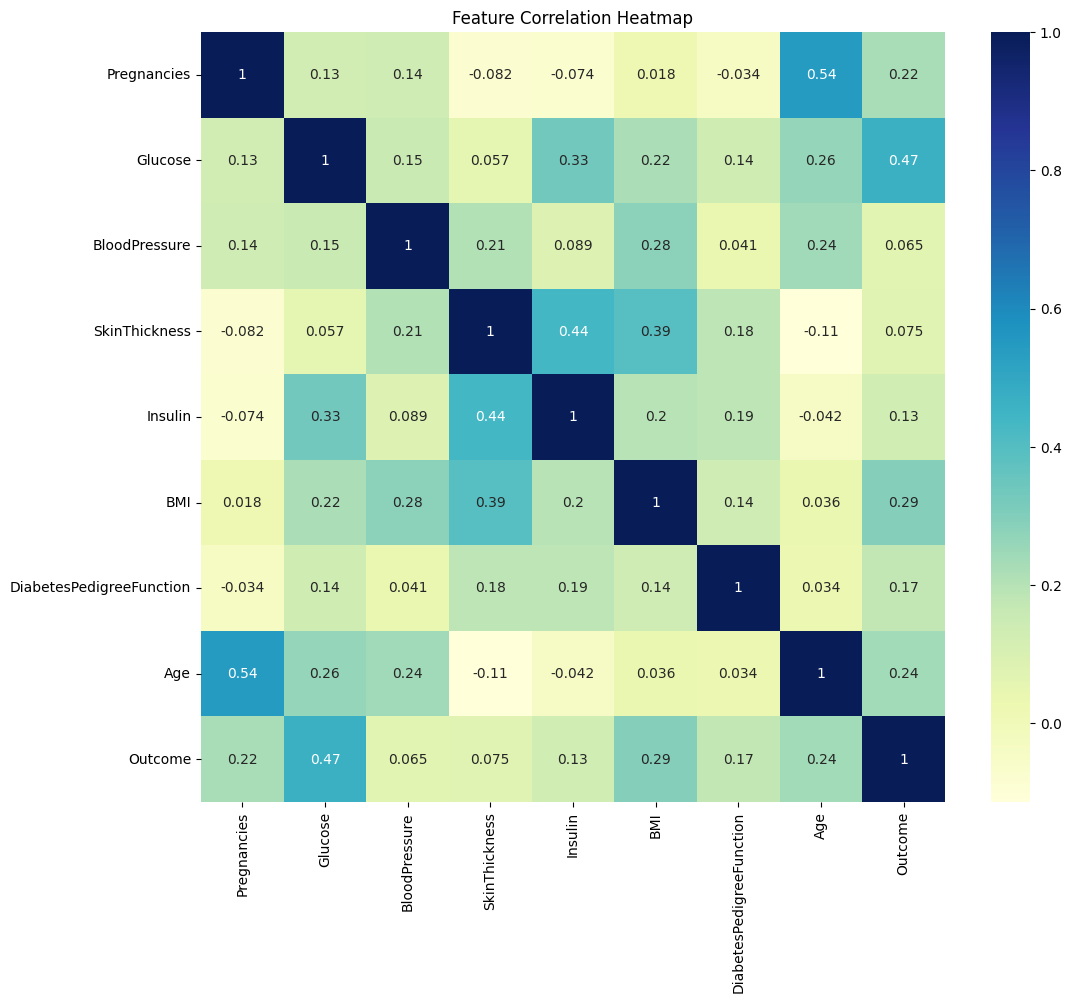

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

In [19]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)


In [23]:
log_acc = accuracy_score(y_test, log_pred)
print(f"Logistic Regression Accuracy: {log_acc:.4f}")

Logistic Regression Accuracy: 0.7532


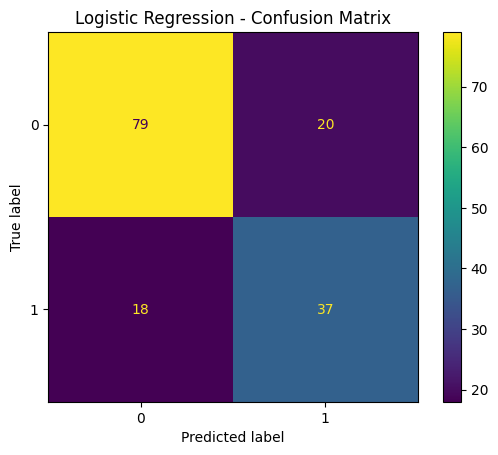

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, log_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [27]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)


In [28]:
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")


Decision Tree Accuracy: 0.7273


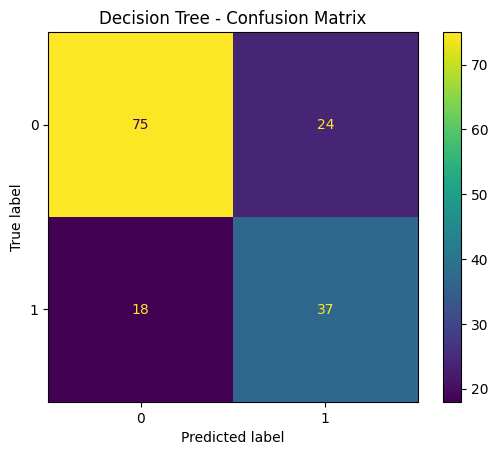

In [29]:
cm = confusion_matrix(y_test, dt_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()


In [31]:


rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


Random Forest Accuracy: 0.7468


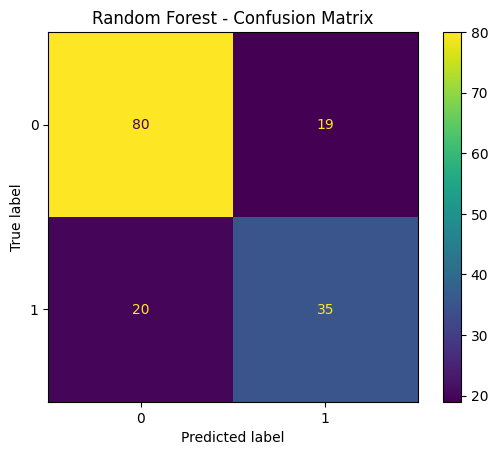

In [32]:

rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [33]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)



SVM Accuracy: 0.7338


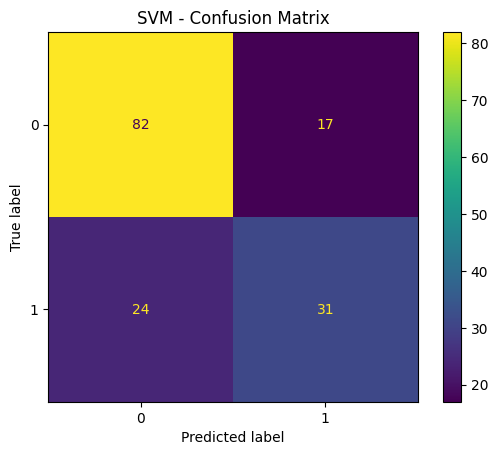

In [34]:
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc:.4f}")

cm = confusion_matrix(y_test, svm_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("SVM - Confusion Matrix")
plt.show()


In [35]:
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)


Neural Network Accuracy: 0.7338


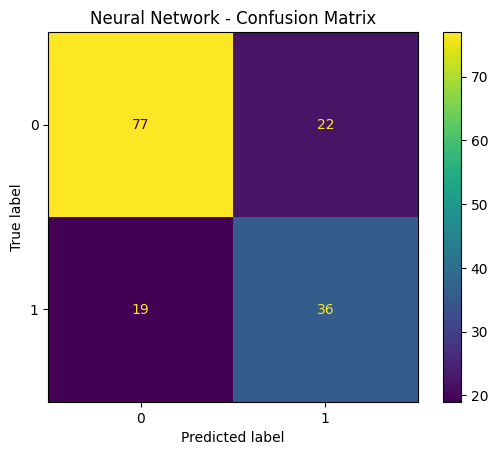

In [36]:
nn_acc = accuracy_score(y_test, nn_pred)
print(f"Neural Network Accuracy: {nn_acc:.4f}")

cm = confusion_matrix(y_test, nn_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Neural Network - Confusion Matrix")
plt.show()

C:\Users\shrey\AppData\Local\Temp\ipykernel_13724\820043756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='crest')


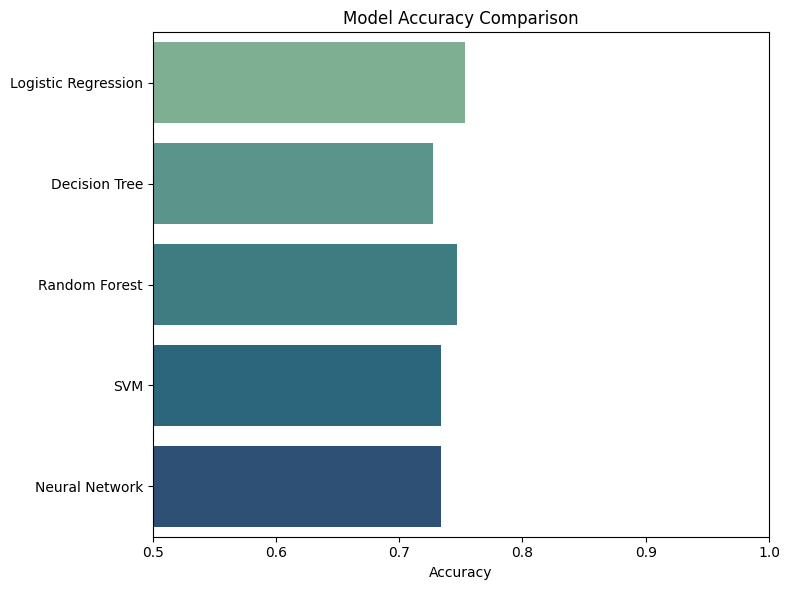

In [43]:
accuracies = {
    'Logistic Regression': log_acc,
    'Decision Tree': dt_acc,
    'Random Forest': rf_acc,
    'SVM': svm_acc,
    'Neural Network': nn_acc
}

plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.values()), y=list(accuracies.keys()), palette='crest')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()
